<a href="https://colab.research.google.com/github/Uma1709/intership/blob/main/Assignment3(internship).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Q2. Create a file that contains multiple lines of random strings and file size must be 5 MB.
file_size_limit = 5 * 1024 * 1024  # 5 MB
with open('random_strings_file_5mb.txt', 'w') as file:
    while os.stat('random_strings_file_5mb.txt').st_size < file_size_limit:
        random_string = ''.join(random.choice(string.ascii_letters) for _ in range(10))
        file.write(random_string + '\n')

# Q3. Create 10 files that contain multiple lines of random strings and file size of each file must be 5 MB.
num_files = 10
file_size_limit = 5 * 1024 * 1024  # 5 MB
for i in range(1, num_files+1):
    filename = f'random_strings_file_{i}.txt'
    with open(filename, 'w') as file:
        while os.stat(filename).st_size < file_size_limit:
            random_string = ''.join(random.choice(string.ascii_letters) for _ in range(10))
            file.write(random_string + '\n')


In [ ]:
# Q1. Create a file that contains 1000 lines of random strings.
with open('random_strings_1000.txt', 'w') as file:
    for _ in range(1000):
        random_string = ''.join(random.choice(string.ascii_letters) for _ in range(10))
        file.write(random_string + '\n')

Number of rows with missing values: 51


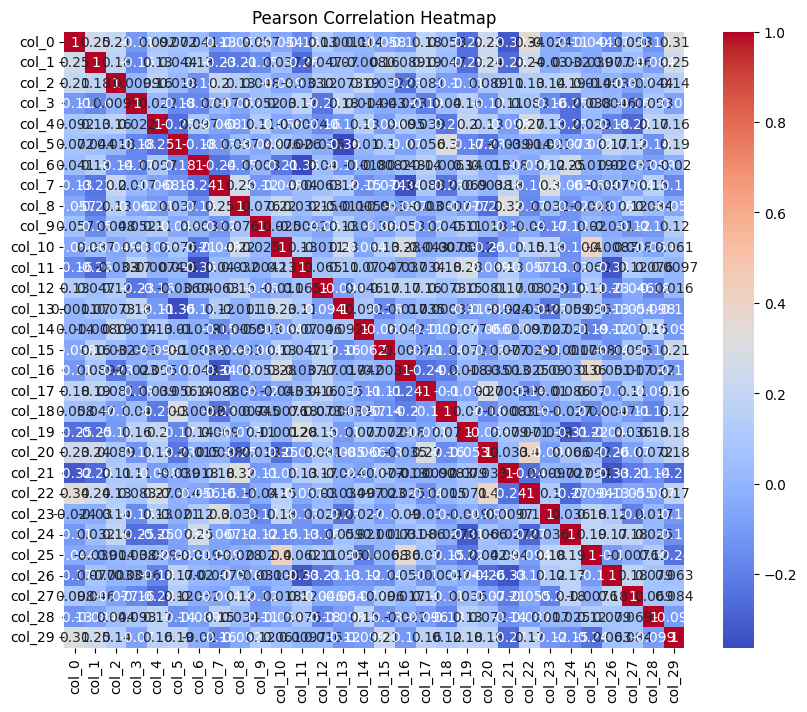

Selected columns with correlation <= 0.7: Index([], dtype='object')


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Q12. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200].
np.random.seed(42)
dataset = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)), columns=[f'col_{i}' for i in range(30)])

# (i) Replace all the values with NA in the dataset defined between [10, 60].
dataset.loc[10:60] = np.nan

# Count the number of rows having missing values.
missing_rows = dataset.isnull().any(axis=1).sum()
print("Number of rows with missing values:", missing_rows)

# (ii) Replace all the NA values with the average of the column value.
dataset.fillna(dataset.mean(), inplace=True)

# (iii) Find the Pearson correlation among all the columns and plot a heatmap.
correlation = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

# Select columns with correlation <= 0.7
selected_columns = correlation.columns[correlation.max() <= 0.7]
print("Selected columns with correlation <= 0.7:", selected_columns)

# (iv) Normalize all the values in the dataset between 0 and 10.
normalized_dataset = (dataset - dataset.min()) / (dataset.max() - dataset.min()) * 10

# (v) Replace all the values in the dataset with 1 if value <= 0.5 else with 0.
binary_dataset = normalized_dataset.applymap(lambda x: 1 if x <= 0.5 else 0)


. Create a random dataset of 500 rows and 10 columns.
Columns 1 to 4 are defined between [-10, 10];
Columns 5 to 8 are defined between [10, 20];
Columns 9 to 10 are defined between [-100, 100].
Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric
graph using each algorithm.
(i) K-Mean clustering
(ii) Hierarchical clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

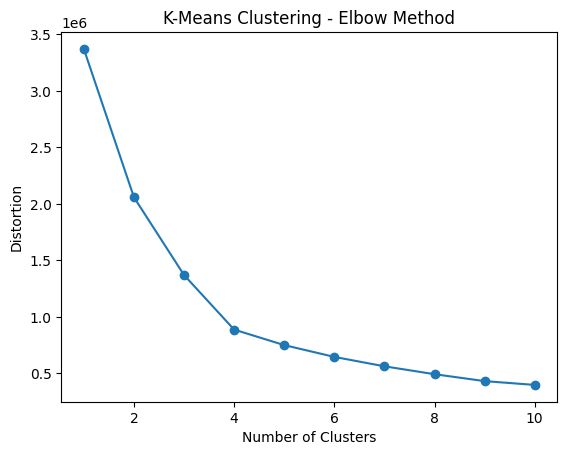

AttributeError: ignored

<Figure size 1000x800 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Generate a random dataset
np.random.seed(42)
dataset = pd.DataFrame(np.random.uniform(-10, 10, size=(500, 4)), columns=['col_1', 'col_2', 'col_3', 'col_4'])
dataset[['col_5', 'col_6', 'col_7', 'col_8']] = np.random.uniform(10, 20, size=(500, 4))
dataset[['col_9', 'col_10']] = np.random.uniform(-100, 100, size=(500, 2))

# (i) K-Means Clustering
distortions = []
max_clusters = 10
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset)
    distortions.append(kmeans.inertia_)

# Determine the optimal number of clusters using the elbow method
plt.plot(range(1, max_clusters + 1), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('K-Means Clustering - Elbow Method')
plt.show()

# (ii) Hierarchical Clustering
linkage = 'ward'  # You can also try 'complete' or 'average' linkage
hierarchical = AgglomerativeClustering(n_clusters=None, linkage=linkage, distance_threshold=0)
hierarchical.fit(dataset)

# Plot the distance metric graph (Dendrogram)
plt.figure(figsize=(10, 8))
dendrogram(hierarchical.linkage_, truncate_mode='level', p=5, show_leaf_counts=True)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering - Dendrogram')
plt.show()


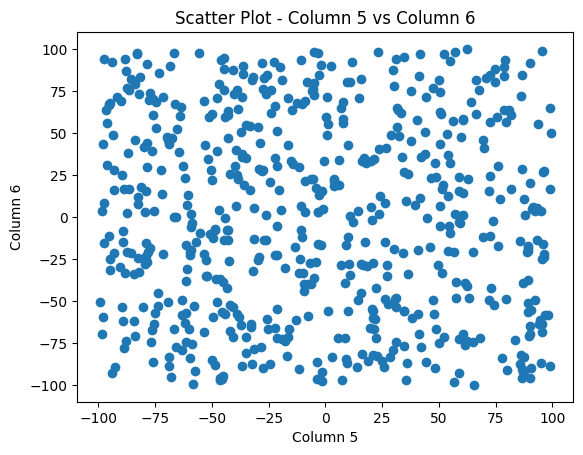

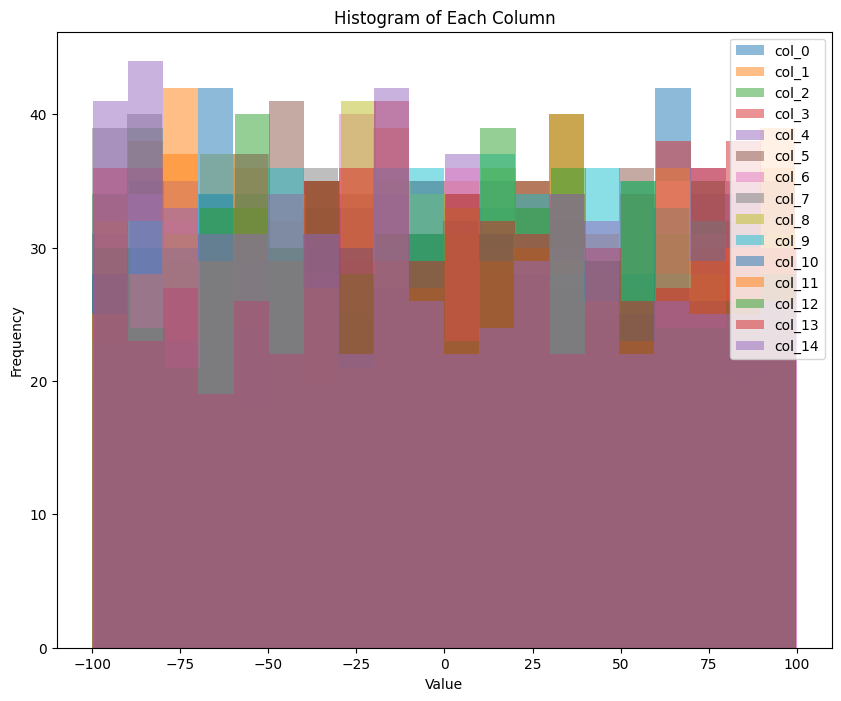

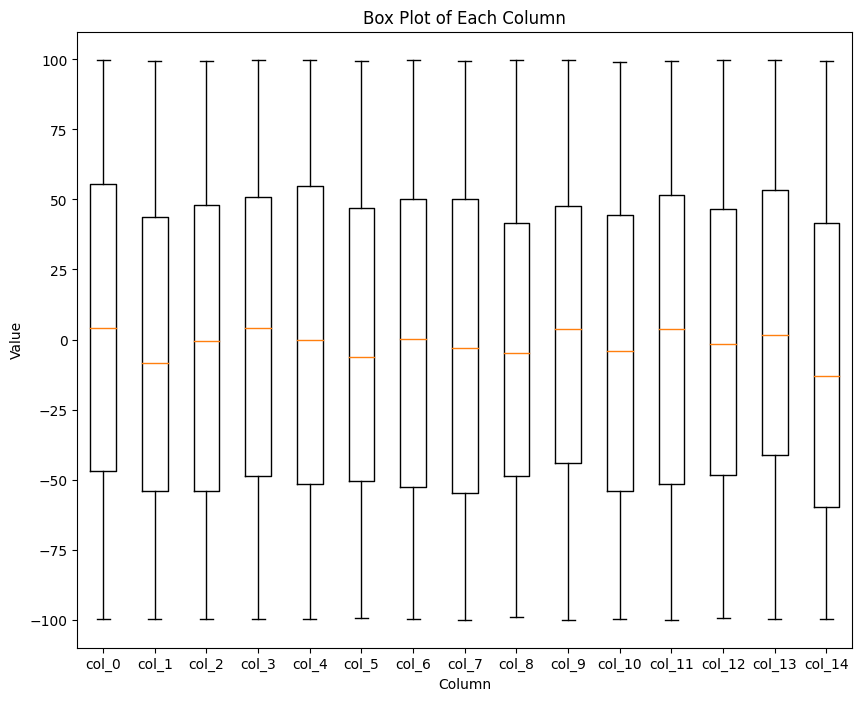

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a random dataset
np.random.seed(42)
dataset = pd.DataFrame(np.random.uniform(-100, 100, size=(600, 15)), columns=[f'col_{i}' for i in range(15)])

# (i) Plot scatter graph between Column 5 and Column 6.
plt.scatter(dataset['col_5'], dataset['col_6'])
plt.xlabel('Column 5')
plt.ylabel('Column 6')
plt.title('Scatter Plot - Column 5 vs Column 6')
plt.show()

# (ii) Plot histogram of each column in a single graph.
plt.figure(figsize=(10, 8))
for column in dataset.columns:
    plt.hist(dataset[column], bins=20, alpha=0.5, label=column)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Each Column')
plt.legend()
plt.show()

# (iii) Plot the Box plot of each column in a single graph.
plt.figure(figsize=(10, 8))
plt.boxplot(dataset.values, labels=dataset.columns)
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Box Plot of Each Column')
plt.show()


In [ ]:
#15)
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, ranksums

# Generate a random dataset
np.random.seed(42)
dataset = pd.DataFrame(np.random.uniform(5, 10, size=(500, 5)), columns=[f'col_{i}' for i in range(1, 6)])

# (i) Perform t-Test on each column.
t_test_results = {}
for column in dataset.columns:
    t_statistic, p_value = ttest_1samp(dataset[column], 5.5)
    t_test_results[column] = (t_statistic, p_value)

print("T-Test Results:")
for column, result in t_test_results.items():
    print(f"Column {column}: t-statistic={result[0]}, p-value={result[1]}")

# (ii) Perform Wilcoxon Signed Rank Test on each column.
wilcoxon_results = {}
for column in dataset.columns:
    statistic, p_value = wilcoxon(dataset[column] - 5.5)
    wilcoxon_results[column] = (statistic, p_value)

print("\nWilcoxon Signed Rank Test Results:")
for column, result in wilcoxon_results.items():
    print(f"Column {column}: statistic={result[0]}, p-value={result[1]}")

# (iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4.
column_3 = dataset['col_3']
column_4 = dataset['col_4']

# Two Sample t-Test
t_statistic, p_value = ttest_ind(column_3, column_4)
print("\nTwo Sample t-Test Results:")
print(f"t-statistic={t_statistic}, p-value={p_value}")

# Wilcoxon Rank Sum Test
statistic, p_value = ranksums(column_3, column_4)
print("\nWilcoxon Rank Sum Test Results:")
print(f"statistic={statistic}, p-value={p_value}")


T-Test Results:
Column col_1: t-statistic=30.617531610934208, p-value=1.1974341509773828e-116
Column col_2: t-statistic=29.67967087569699, p-value=2.7233063687697677e-112
Column col_3: t-statistic=31.65695549534225, p-value=1.983059494809593e-121
Column col_4: t-statistic=30.780132826446838, p-value=2.1231381300270307e-117
Column col_5: t-statistic=30.539430931285306, p-value=2.7513162293795176e-116

Wilcoxon Signed Rank Test Results:
Column col_1: statistic=2736.0, p-value=1.2245125396273568e-76
Column col_2: statistic=3206.0, p-value=1.8063775177530389e-75
Column col_3: statistic=2295.0, p-value=9.614179407520562e-78
Column col_4: statistic=2904.0, p-value=3.212289633797487e-76
Column col_5: statistic=3010.0, p-value=5.895058450175562e-76

Two Sample t-Test Results:
t-statistic=0.09986315345227309, p-value=0.9204730253478132

Wilcoxon Rank Sum Test Results:
statistic=0.1191248809558157, p-value=0.905176418944118
